## Modeling Strategy

After completing the exploratory data analysis, the next step is to decide how to construct a model for predicting crop production.

The target variable is the crop production volume for a given year `t`, which is defined as the product of the planted area and the crop yield for the same year:

$$
production_t = acres_t \cdot yield_t
$$

Due to practical limitations, only one of the two factors can be predicted by the model, while the other must be taken from the previous year. Therefore, two alternative modeling strategies are considered.

## Strategy 1: Predict Planted Area

In the first strategy, the model predicts the planted area for year `t`, while the crop yield is assumed to be equal to its value from the previous year.

The predicted production is computed as:

$$
\hat{production}_t = acres_t \cdot yield_{t-1}
$$

This strategy assumes that crop yield changes slowly over time, while planted area may vary more significantly from year to year.

## Strategy 2: Predict Crop Yield

In the second strategy, the model predicts the crop yield for year `t`, while the planted area is taken from the previous year.

The predicted production is computed as:

$$
\hat{production}_t = acres_{t-1} \cdot yield_t
$$

This strategy assumes that planted area remains relatively stable over time, while crop yield is more volatile and influenced by external factors such as weather conditions or agricultural practices.

## Model Evaluation Approach

To compare the effectiveness of the two strategies, historical data are used. For each year, the predicted production value is calculated according to both strategies and compared with the actual production.

For simplicity, it is assumed that the model provides perfect predictions for the chosen factor. Under this assumption, the prediction error arises solely from using the previous year's value for the non-predicted factor.

The strategy that results in lower prediction error, measured using regression metrics such as MAE or MSE, is considered to provide a more accurate forecast of crop production.

This evaluation allows us to determine which factor should be predicted in order to achieve the most accurate production estimates.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# configure display format for floating point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.rcParams['figure.figsize'] = [15, 7] # указываем размер графика

In [34]:
# creating a dataframe
crops_usa = pd.read_csv(
    "C:\\Users\\HOME\\ya_datasets\\crops_usa.csv")
print(crops_usa)

      Year          State  State ANSI    Acres  Production
0     2019        ALABAMA           1   130000     6120000
1     2019        ARIZONA           4    34000     3432000
2     2019       ARKANSAS           5   110000     2600000
3     2019     CALIFORNIA           6   420000     7244000
4     2019       COLORADO           8  2150000    98000000
...    ...            ...         ...      ...         ...
1665  1980       VIRGINIA          51   317000    10582000
1666  1980     WASHINGTON          53  3320000   160220000
1667  1980  WEST VIRGINIA          54    12000      380000
1668  1980      WISCONSIN          55   119000     4365000
1669  1980        WYOMING          56   352000     8620000

[1670 rows x 5 columns]


In [12]:
# значения Acres за 2019 год
acres_2019 = crops_usa[crops_usa['Year'] == 2019]['Acres']

# значения State за 2019 год
states_2019 = crops_usa[crops_usa['Year'] == 2019]['State']

In [13]:
# aggregate planted area and production by year
acres_usa = crops_usa.groupby('Year')['Acres'].sum()
production_usa = crops_usa.groupby('Year')['Production'].sum()

# compute yield as production per acre
yield_usa = production_usa / acres_usa

# estimate production using current-year acres
# and previous-year yield
predict_acres = acres_usa * yield_usa.shift(1)

print(predict_acres)

Year
1980             NaN
1981   2600878923.03
1982   2721633803.85
1983   2450320219.56
1984   2508296608.33
1985   2474296904.49
1986   2310603452.31
1987   1911443825.25
1988   2098079727.25
1989   2118783738.73
1990   2047942143.68
1991   2476079184.04
1992   2046388266.35
1993   2465055983.38
1994   2336037545.17
1995   2277497042.05
1996   2374763285.19
1997   2135083467.89
1998   2319669567.49
1999   2425142783.37
2000   2291347223.92
2001   2117124256.50
2002   1976485227.72
2003   1654412692.70
2004   2250209817.35
2005   2068918634.90
2006   2107736490.19
2007   1907015581.68
2008   2158188311.21
2009   2330266536.18
2010   1969487862.14
2011   2231136438.07
2012   2030456355.99
2013   2290677767.06
2014   2157947601.87
2015   1960645021.90
2016   1878872978.13
2017   2121449207.36
2018   1807556928.04
2019   1780401017.42
dtype: float64


In [15]:
# strategy 1:
# use current-year acres and previous-year yield
predict_acres = acres_usa * yield_usa.shift(1)
print(predict_acres)

Year
1980             NaN
1981   2600878923.03
1982   2721633803.85
1983   2450320219.56
1984   2508296608.33
1985   2474296904.49
1986   2310603452.31
1987   1911443825.25
1988   2098079727.25
1989   2118783738.73
1990   2047942143.68
1991   2476079184.04
1992   2046388266.35
1993   2465055983.38
1994   2336037545.17
1995   2277497042.05
1996   2374763285.19
1997   2135083467.89
1998   2319669567.49
1999   2425142783.37
2000   2291347223.92
2001   2117124256.50
2002   1976485227.72
2003   1654412692.70
2004   2250209817.35
2005   2068918634.90
2006   2107736490.19
2007   1907015581.68
2008   2158188311.21
2009   2330266536.18
2010   1969487862.14
2011   2231136438.07
2012   2030456355.99
2013   2290677767.06
2014   2157947601.87
2015   1960645021.90
2016   1878872978.13
2017   2121449207.36
2018   1807556928.04
2019   1780401017.42
dtype: float64


In [16]:
# strategy 2:
# use previous-year acres and current-year yield
predict_yield = acres_usa.shift(1) * yield_usa
print(predict_yield)

Year
1980             NaN
1981   2549811575.12
1982   2829704781.48
1983   2730554746.44
1984   2503254056.32
1985   2542151605.15
1986   2193272104.09
1987   2305201425.36
1988   1820497484.00
1989   1741924439.37
1990   2714683629.11
1991   2183023836.22
1992   2386938493.17
1993   2398133526.77
1994   2380994140.76
1995   2224382162.97
1996   2093207789.47
1997   2646857125.63
1998   2724996068.91
1999   2411209861.48
2000   2232256602.66
2001   2049590081.05
2002   1582289553.63
2003   2275638048.47
2004   2247084155.82
2005   2192657676.44
2006   1804630987.27
2007   1945039354.81
2008   2387242909.29
2009   2381089116.80
2010   2425981155.28
2011   1932264141.72
2012   2210881235.56
2013   2099216317.41
2014   2004742512.62
2015   2130996467.19
2016   2533605162.76
2017   1894541943.02
2018   1815647895.26
2019   2033115866.18
dtype: float64


In [18]:
error_acres = production_usa - predict_acres
error_acres

Year
1980             NaN
1981    184478076.97
1982     43333196.15
1983    -30496219.56
1984     86480391.67
1985    -50181904.49
1986   -220033452.31
1987    196241174.75
1988   -285878727.25
1989    -82165738.73
1990    681835856.32
1991   -495940184.04
1992    420409733.65
1993    -68615983.38
1994    -15056545.17
1995    -94789042.05
1996    -97375285.19
1997    346382532.11
1998    227651432.51
1999   -129582783.37
2000    -63187223.92
2001   -169671256.50
2002   -370607227.72
2003    690002307.30
2004    -93419817.35
2005     34406365.10
2006   -299320490.19
2007    144072418.32
2008    353707688.79
2009   -121348536.18
2010    193535137.86
2011   -238025438.07
2012    221850644.01
2013   -155698767.06
2014   -131637601.87
2015    101293978.10
2016    429790021.87
2017   -380539207.36
2018     77599071.96
2019    139737982.58
dtype: float64

In [20]:
error_acres = error_acres.dropna()
error_acres

Year
1981    184478076.97
1982     43333196.15
1983    -30496219.56
1984     86480391.67
1985    -50181904.49
1986   -220033452.31
1987    196241174.75
1988   -285878727.25
1989    -82165738.73
1990    681835856.32
1991   -495940184.04
1992    420409733.65
1993    -68615983.38
1994    -15056545.17
1995    -94789042.05
1996    -97375285.19
1997    346382532.11
1998    227651432.51
1999   -129582783.37
2000    -63187223.92
2001   -169671256.50
2002   -370607227.72
2003    690002307.30
2004    -93419817.35
2005     34406365.10
2006   -299320490.19
2007    144072418.32
2008    353707688.79
2009   -121348536.18
2010    193535137.86
2011   -238025438.07
2012    221850644.01
2013   -155698767.06
2014   -131637601.87
2015    101293978.10
2016    429790021.87
2017   -380539207.36
2018     77599071.96
2019    139737982.58
dtype: float64

In [21]:
years_numbers = error_acres.index.values
years_numbers

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

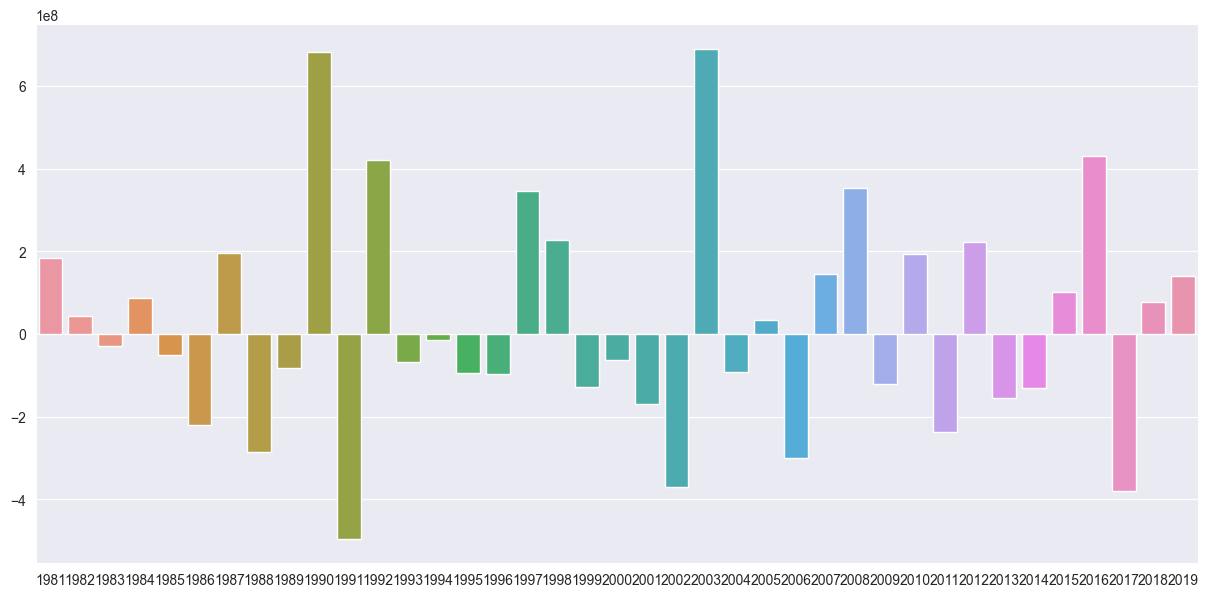

In [23]:
sns.barplot(
    x=years_numbers,
    y=error_acres
)

plt.show()

In [29]:
error_yield = production_usa - predict_yield
# Удаляем самое первое значение методом dropna(),
# оно не понадобится, ведь данных за 1979 год нет,
# и разность находить не с чем
error_yield = error_yield.dropna()

In [30]:
# достаём индексы столбца error_acres — это числа с 1981 до 2019
years_numbers = error_yield.index.values

<Axes: >

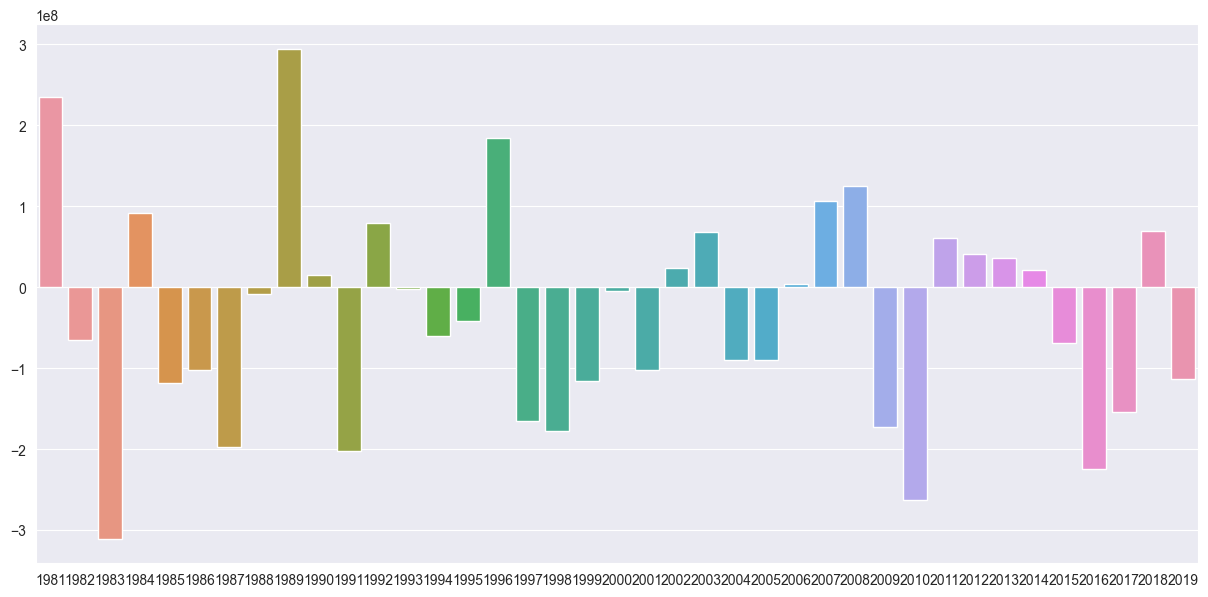

In [31]:
sns.barplot(
    x=years_numbers,
    y=error_yield
)

## MSE, MAE

#### MAE отвечает на вопрос:
«На сколько в среднем мы ошибаемся в тоннах?»

#### MSE отвечает на вопрос:
«Насколько сильно стратегия наказывается за большие промахи?»

In [37]:
# MAE
mae_acres = np.mean(np.abs(error_acres))
mae_yield = np.mean(np.abs(error_yield))

print("MAE (predict acres):", mae_acres)
print("MAE (predict yield):", mae_yield)

MAE (predict acres): 209394344.66107476
MAE (predict yield): 110396388.66393326


In [39]:
# MSE
mse_acres = np.mean(error_acres ** 2)
mse_yield = np.mean(error_yield ** 2)

print("MSE (predict acres):", mse_acres)
print("MSE (predict yield):", mse_yield)

MSE (predict acres): 7.124124481885024e+16
MSE (predict yield): 1.8859583018349016e+16
